<a href="https://colab.research.google.com/github/bhshre/youtube-views-prediction-xgboost/blob/main/XGBoost_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Project Title : YouTube Video Performance Prediction using XGBoost

 ## Objective of the Project
The goal of this project is to predict the number of views a YouTube video will receive based on various viewer engagement metrics such as likes, shares, comments, and watch time. This helps understand what drives video performance and can assist content creators in optimizing their strategy.

## What is XGBoost?
XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm based on gradient boosting. It builds a series of decision trees, where each tree corrects the errors of the previous one. It's known for high performance, accuracy, and speed.

## Why Use XGBoost in This Project?
It handles non-linear relationships in complex engagement data.

It gives high accuracy and works well on tabular datasets.

It provides feature importance, helping us understand what affects video views most.

It is widely used in real-world data science applications and competitions.

## Why we are not using Random forest?

We use XGBoost instead of Random Forest because XGBoost offers better performance through gradient boosting, regularization, and faster training—making it more accurate and efficient for predicting views.












##  Step 1: Setup Google Colab

In [ ]:
# Install XGBoost if not already installed
!pip install xgboost


##  Step 2: Import Libraries

In [ ]:
# These are basic Python libraries for data science
import pandas as pd                # For data handling
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For plotting graphs
import seaborn as sns              # For better visualizations

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance

## Step 3: Load the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving youtube_data.csv to youtube_data (1).csv


## Step 4: Read the dataset

In [ ]:
df = pd.read_csv("youtube_data.csv")
df.head()  # Show first 5 rows to understand the data

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 5: Exploratory Data Analysis(EDA)

In [ ]:
# Dataset shape and basic info
print("Dataset shape:", df.shape)
df.info()  # Column data types and non-null counts
df.describe()  # Summary stats of numeric columns


Dataset shape: (234889, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        234889 non-null  object 
 1   day                             234889 non-null  object 
 2   views                           234889 non-null  float64
 3   redViews                        234889 non-null  float64
 4   comments                        234889 non-null  float64
 5   likes                           234889 non-null  float64
 6   dislikes                        234889 non-null  float64
 7   videosAddedToPlaylists          234889 non-null  float64
 8   videosRemovedFromPlaylists      234889 non-null  float64
 9   shares                          234889 non-null  float64
 10  estimatedMinutesWatched         234889 non-null  float64
 11  estimatedRedMinutesWatched      234889 non-null  f

,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
count,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,...,234889.0,234889.0,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000
mean,88.842121,18.717326,0.039419,0.969816,0.032215,1.262835,0.228908,0.337198,3466.270749,690.027341,...,0.0,0.0,0.000429,0.000178,0.040185,10.419104,0.002150,0.017587,0.167173,0.004743
std,331.280375,78.293400,0.355816,3.984013,0.241694,7.535244,5.702640,1.552007,12548.191609,2721.536527,...,0.0,0.0,0.013099,0.016315,0.617346,90.929272,0.061275,0.364308,0.826207,0.079772
min,0.000000,0.000000,0.000000,-11.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,25.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1047.000000,234.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8818.000000,2658.000000,24.000000,206.000000,11.000000,2678.000000,2647.000000,251.000000,285103.000000,78470.000000,...,0.0,0.0,1.250000,7.000000,60.000000,5894.000000,8.000000,111.000000,31.000000,9.000000


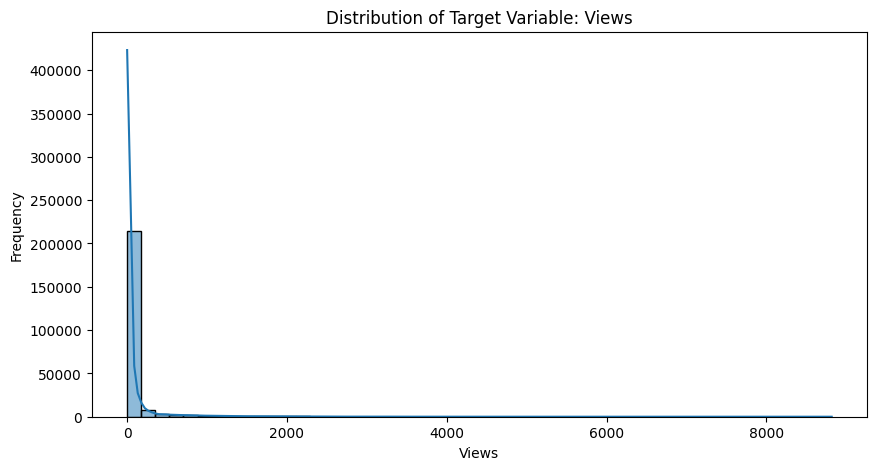

In [ ]:
# Distribution of 'views'
plt.figure(figsize=(10, 5))
sns.histplot(df['views'], bins=50, kde=True)
plt.title("Distribution of Target Variable: Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Skewness in target
print("Skewness of 'views':", df['views'].skew())

Skewness of 'views': 8.191290641848271


## Insight:
 A skewness of 8.19 indicates extreme positive skew (right-skewed distribution).

This means most videos have low view counts, while a few videos have very high views (viral videos).

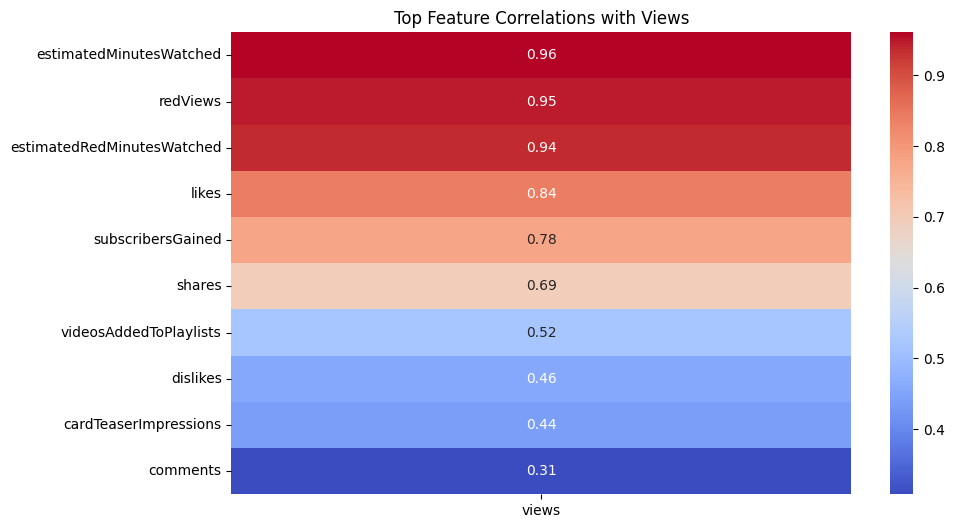

In [ ]:
# Correlation Heatmap with Target
plt.figure(figsize=(10,6))

# Compute correlations of all features with 'views' only
correlation_with_target = df.corr(numeric_only=True)['views'].sort_values(ascending=False)

# Plot top 10 correlations with 'views' (excluding itself)
top_corr_features = correlation_with_target.drop('views').head(10)

sns.heatmap(top_corr_features.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Feature Correlations with Views')
plt.show()

# 📌 Insight:
# This shows which features most strongly influence YouTube views.



## Insight:

The heatmap shows that "estimatedMinutesWatched" and "redViews" have the strongest positive correlation with "Views", while "comments" has the weakest positive correlation.

## Step 6: Data Preprocessing

In [ ]:
# Convert 'day' column to proper datetime format for analysis
# If the date format is invalid, set to NaT (Not a Time)
df['day'] = pd.to_datetime(df['day'], errors='coerce')

In [ ]:
#check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   video_id                        234889 non-null  object        
 1   day                             234889 non-null  datetime64[ns]
 2   views                           234889 non-null  float64       
 3   redViews                        234889 non-null  float64       
 4   comments                        234889 non-null  float64       
 5   likes                           234889 non-null  float64       
 6   dislikes                        234889 non-null  float64       
 7   videosAddedToPlaylists          234889 non-null  float64       
 8   videosRemovedFromPlaylists      234889 non-null  float64       
 9   shares                          234889 non-null  float64       
 10  estimatedMinutesWatched         234889 non-null  float64

##  Step 7: Drop Missing or Invalid Rows

In [ ]:
# Drop rows where 'day' couldn't be converted to date (invalid entries)
df = df.dropna(subset=['day'])

## Step 8:  Drop Columns with Only Zeros (like annotationClickThroughRate)

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]  # Keep only columns that are not all zeros

## Step 9:  Handle Missing Values

In [ ]:
# Fill remaining missing values with 0
# We do this because machine learning models like XGBoost cannot handle missing values directly.
# Filling with 0 is a quick way when the missing data is minimal or represents absence (e.g., 0 shares or 0 likes).
# Alternatively, we could fill with mean/median based on the column's nature.
df.fillna(0, inplace=True)

## Step 10: Feature Engineering - Add day_of_week Column

In [ ]:
# Extract the day of the week from 'day' column (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['day'].dt.dayofweek


Interpretation: We extract day_of_week to help the model learn if video performance varies by day (e.g., weekend vs weekday)."

## Step 11: Drop Unnecessary Columns

In [ ]:
# Drop 'day' and 'video_id' as they are not useful for prediction
df.drop(['day', 'video_id'], axis=1, inplace=True)

## Step 12:  Define Features (X) and Target (y)

In [ ]:
# X = All columns except 'views' (our target)
# y = 'views' column which we want to predict
X = df.drop('views', axis=1)
y = df['views']

 ## Step 13: Train-Test Split

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 14: Train XGBoost Regressor

In [ ]:
# n_estimators = number of trees
# learning_rate = step size shrinkage to prevent overfitting
# max_depth = maximum depth of a tree (controls model complexity)
# random_state = ensures reproducible results
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)  # Train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Step 15: Make Predictions

In [ ]:
# Use the trained model to predict views on the test set
y_pred = model.predict(X_test)


## Step 16: Evaluate the Model

In [ ]:
# RMSE = Root Mean Squared Error: measures average prediction error (lower is better)
# R2 Score = Coefficient of Determination: measures how well predictions match actual data (closer to 1 is better)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
# Predicting 'views' (a continuous numerical value), not classification.
# Hence, confusion matrix is NOT needed. Instead, we use metrics like RMSE and R² Score.


Model Evaluation:
RMSE: 32.65
R^2 Score: 0.99


## Insight from Evaluation
 The model achieved a very high R² score of 0.99, indicating it explains 99% of the variance in YouTube video views.

 The low RMSE of 32.65 suggests that the model's predictions are very close to the actual view counts.

This shows the model is highly effective and reliable for predicting video performance.


# Step 17: Feature Importance

<Figure size 1200x600 with 0 Axes>

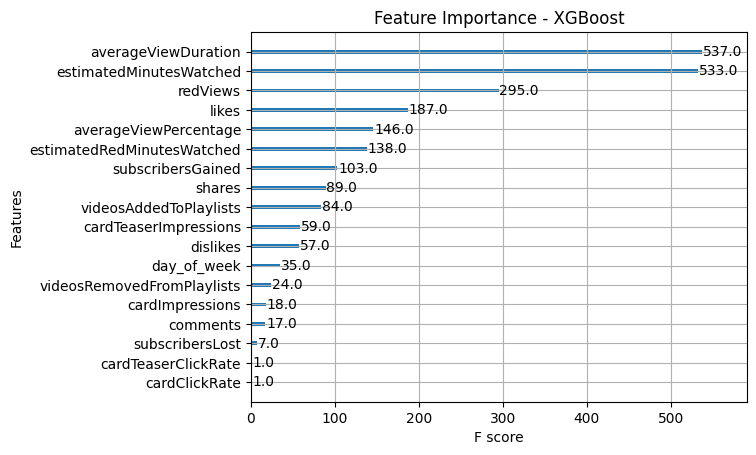

In [ ]:
# Show which features were most important in predicting views
plt.figure(figsize=(12, 6))
plot_importance(model)
plt.title("Feature Importance - XGBoost")
plt.show()

## Insight:
The XGBoost feature importance plot indicates that "averageViewDuration" and "estimatedMinutesWatched" are the most influential features, while "cardTeaserClickRate" and "cardClickRate" are the least important.

 # Step 18: Project Conclusion
Successfully built a regression model using XGBoost to predict YouTube video views.

Achieved R² Score of 0.99 and RMSE of 32.65, indicating excellent model performance.

Feature importance analysis helped identify key factors influencing view count.

Applied proper EDA, feature engineering, and preprocessing for clean and informative data.

This model can guide content creators in optimizing videos based on performance metrics.

